# Optimizing behaviour in Bertrand and Cournot competition

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
from numpy import array 
from scipy import arange
import sympy as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from random import randrange
from modelproject import run_bertrand_model
from modelproject import run_cournot_model

# Model description

**The Bertrand model** is a model of competition in which two firms produce a homogenous good and compete by setting the prices simultaneusly. The firms ends up selling their good at the marginal cost and making zero profits. 
The demand for firm 1 depends on the price set by its rival:


**The total demand**
*The demand for firm i*
$$
q_i\left(p_1\right)= \begin{cases} a - p_1 * b & \text { if } p_1<p_2 \\ \frac{1}{2}\left(a - p_1 * b\right) & \text { if } p_1=p_2 \\ 0 & \text { else } \end{cases}
$$
*The profit of firm i*
$$
\pi_1\left(p_1\right)=\max(p_i-c,0)q_i
$$

*The normal form:*

Firms: $\{F i r m _1, Firm _2\}$\
Strategy sets: $S_i:=(R)^{+}$\
Pay-offs: $\pi_i\left(p_i, p_j\right)$

## Numerical solution

Profit for firm i in the case $p_i<p_j$
$$\pi_i=(a-bp_i)(p_i-c)$$
$$\frac{\partial \pi_i}{\partial p_i}=a+bc-2bp_i=0$$
$$p_i=\frac{1}{2}\left(\frac{a}{b}+c\right)$$

Profit for firm i when $p_i>p_j$ is equal to 0 and the profit is negative if $p_i<c$.

$$p_i=\lim_{k\rightarrow 0^+}\max\left(\min\left(\frac{1}{2}\left(\frac{a}{b}+c\right),p_j-k\right),c\right)$$
Firm i chooses the optimal response unless the optimal response is larger than $p_j$ in which case it chooses a value marginally smaller than $p_j$. If the chosen value is smaller than c firm i will instead choose c.

We can insert firm j's symmetrical optimal response:
$$p_i=\lim_{k\rightarrow 0^+}\max\left(\min\left(\frac{1}{2}\left(\frac{a}{b}+c\right),\max\left(\min\left(\frac{1}{2}\left(\frac{a}{b}+c\right),p_i-k\right),c\right)-k\right),c\right)$$
Any value of $p_i$ larger than c will recuire $p_i$ to be marginally smaller than $p_i$. Any value smaller than c, will require $p_i$ to be c.
Therefore the only solution is
$$p_i=c$$

This makes sense given perfect rationality for both players. They know they will bid each other down to the price of c.

## Analytical solution

Our Bertrand model takes the inputs: Startingvalue $p_1$, startingvalue $p_2$, marginal cost, maximum total quantity for weakly positive prices and numer of periods in the simulation.

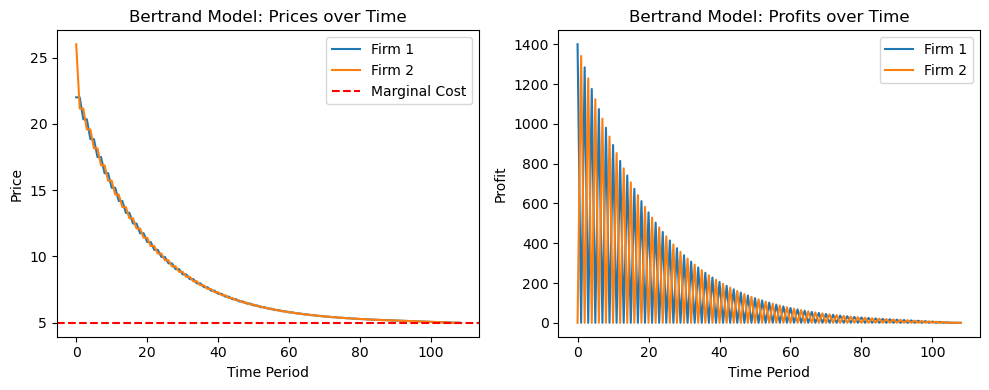

In [2]:
run_bertrand_model(randrange(10,40),randrange(10,40),5,100)

The outcome of the prices over time is what we would expect since the Bertrand competition with homogeneous goods leads to prices converging to marginal costs. No other price could be an equilibrium. If both firms set the same price above the marginal cost and share the market, then both of the firms has an incentive to under bid the other by an small amount and capture the whole market and almost double its profits. This is due to the two firms competing over goods that are perfect substitutes. Also there can be no equilibrium with firms setting different prices. The firms setting the higher price will earn nothing since the lower priced firm serves all of the customers. Hence the higher priced firm will want to lower its price to under bid the lower-priced firm. The only equilibrium in the Bertrand model is when both firms set price equal to the marginal cost.


The outcome is that profits wil converge to zero over time.

# A repeated "Cournot model" with limited rationality
Cournot competition is a game between a finite number of firms supplying the same good. In contrary to perfect competition all the individual suppliers have market power that enable them to effect prices in the market through the quantity produced. The market will clear at any quantity supplied through the mechanism of lowering prices.

In a market with $n$ firms, where firm $i\in[1,2,...,n]$, we have a price function depending on the quantities produced $p(q_1,q_2,...,q_n)$ where
$$\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_i}=\frac{\partial p(q_1,q_2,...,q_n)}{\partial q_j}<0$$
Every firm has constant and identical marginal costs $(c_i=c_j=c)$. Firm $i$ will choose $q_i$ in order to maximize the profit function
$$\pi(q_i)=p(q_1,q_2,...,q_n)q_i-cq_i$$

In the Cournot model with perfect rationality the profit maximizing agents will immediatly recognize the equillibrium quantities and therefore produce that quantity at the start of the game. In this Cournot inspired model two agents have limited rationality and will only maximize profits given the quantity produced by the other player in the last round. This model illustrates long run equillibrium even with these relaxed restrictions.

If we were to solve the Cournot game analytically, we would find the best response function
$$q_i=\frac{1}{2}(a-c-q_j)$$
where a is maximum total demand at price zero and c is the marginal cost. In this model player $i$ numerically maximizes $\pi_{it}(q_{it})$ given the expectation that $q_{jt}=q_{jt-1}$. This would be analogous to modelling $q_{it}=\frac{1}{2}(a-c-q_{jt-1})$.

Our Cournot model takes the inputs: Startingvalue $q_1$, startingvalue $q_2$, marginal cost, maximum total quantity for weakly positive prices and numer of periods in the simulation.

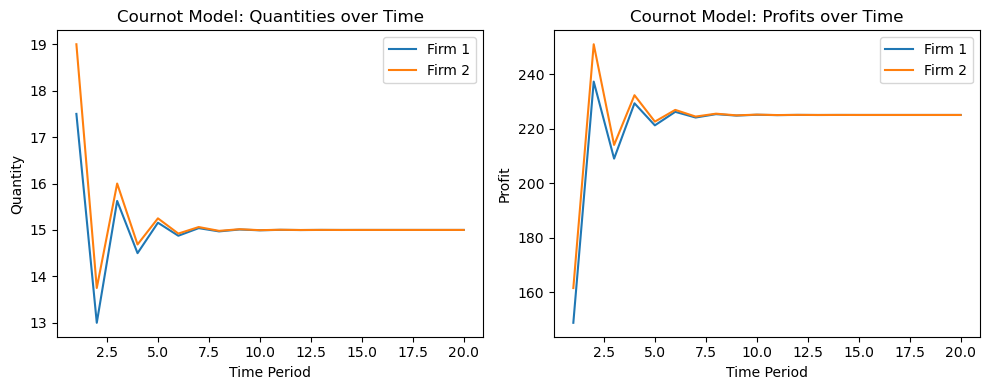

Price: [19.99960327]
Quantity - Firm 1: 15.0
Quantity - Firm 2: 15.0
Profit - Firm 1: 225.0
Profit - Firm 2: 225.0


In [3]:
run_cournot_model(randrange(45), randrange(45), 5, 50, 20)

In this Cournot model each firm choses the best response to the quatity choses by the other firm in the previous period. Overt time price, quantities and profits will converge to equilibrium.